<a href="https://colab.research.google.com/github/shreyasbkgit/dllab/blob/main/Week_8_Image_Generation(GAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os


dataset_name = 'mnist'

# Load dataset
if dataset_name == 'mnist':
    (x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
else:
    (x_train, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

# Parameters
BUFFER_SIZE = 60000
BATCH_SIZE = 128
NOISE_DIM = 100
EPOCHS = 50
EXAMPLES_TO_GENERATE = 16

# Prepare dataset
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Generator
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(NOISE_DIM,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

# Discriminator
def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

# Losses and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator = make_generator_model()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Loss functions
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

# Training step
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'generated_{dataset_name}_epoch_{epoch:03d}.png')
    plt.close()

# Training loop
seed = tf.random.normal([EXAMPLES_TO_GENERATE, NOISE_DIM])

def train(dataset, epochs):
    for epoch in range(1, epochs + 1):
        for image_batch in dataset:
            train_step(image_batch)
        print(f'Epoch {epoch} completed')
        generate_and_save_images(generator, epoch, seed)

# Start training
train(train_dataset, EPOCHS)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed
Epoch 11 completed
Epoch 12 completed
Epoch 13 completed
Epoch 14 completed
Epoch 15 completed
Epoch 16 completed
Epoch 17 completed
Epoch 18 completed
Epoch 19 completed
Epoch 20 completed
Epoch 21 completed
Epoch 22 completed
Epoch 23 completed
Epoch 24 completed
Epoch 25 completed
Epoch 26 completed
Epoch 27 completed
Epoch 28 completed
Epoch 29 completed
Epoch 30 completed
Epoch 31 completed
Epoch 32 completed
Epoch 33 completed
Epoch 34 completed
Epoch 35 completed
Epoch 36 completed
Epoch 37 completed
Epoch 38 completed
Epoch 39 completed
Epoch 40 completed
Epoch 41 completed
Epoch 42 completed
Epoch 43 completed
Epoch 44 completed
Epoch 45 completed
Epoch 46 completed
Epoch 47 completed
Epoch 48 completed
Epoch 49 completed
Epoch 50 completed


**TO-DO:**

Evaluate the GAN model:

-use t-SNE or UMAP to visualize the distribution of real vs generated image

-Measure image quality & diversity using Inception Score

-Calculate the Frechet Inception Distance

-Calculate the precision and recall for Generative Adversarial Network

-Calculate Disciminator Accuracy

-Plot Generator vs Discriminator Loss

-Repeat the same for fasion mnist dataset

-Repeat the same for non-grayscale dataset


In [6]:
# After training is complete, prepare real and fake images for evaluation
num_samples = 1000

# ✅ Real images from training dataset
real_images = x_train[:num_samples]

# ✅ Fake images generated by the generator
noise = tf.random.normal([num_samples, NOISE_DIM])
fake_images = generator(noise, training=False)

# ✅ Rescale fake images from [-1, 1] to [0, 1]
fake_images = (fake_images + 1.0) / 2.0

# Optional: Rescale real images if needed (only if you had scaled x_train to [-1, 1])
# Not needed in your case, since x_train was normalized to [0, 1]
# real_images = (real_images + 1.0) / 2.0

# Now you can call the embedding function
# plot_embedding(real_images, fake_images, method='tsne')  # or method='umap'


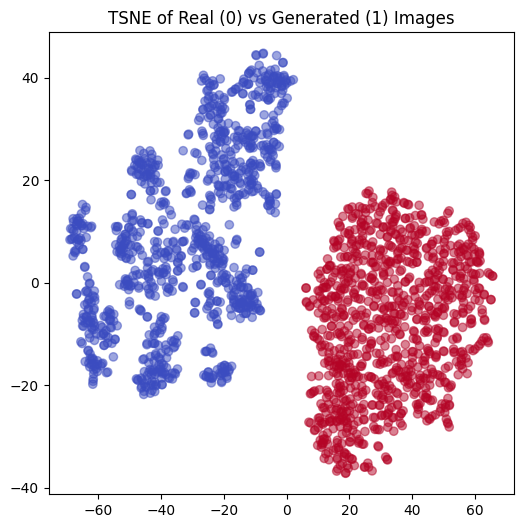

In [7]:
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

def plot_embedding(real_images, fake_images, method='tsne'):
    real = tf.reshape(real_images, (len(real_images), -1)).numpy()
    fake = tf.reshape(fake_images, (len(fake_images), -1)).numpy()
    X = np.concatenate([real, fake])
    y = np.array([0]*len(real) + [1]*len(fake))

    reducer = TSNE(n_components=2) if method == 'tsne' else umap.UMAP()
    X_embedded = reducer.fit_transform(X)

    plt.figure(figsize=(6, 6))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='coolwarm', alpha=0.5)
    plt.title(f'{method.upper()} of Real (0) vs Generated (1) Images')
    plt.show()
plot_embedding(real_images, fake_images, method='tsne')

In [12]:
!pip install tensorflow-gan
import tensorflow_gan as tfgan
import tensorflow_hub as hub


AttributeError: module 'tensorflow' has no attribute 'estimator'

In [19]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
import tensorflow as tf
import numpy as np

def preprocess_images_for_inception(images):
    # Resize to 299x299 and convert grayscale to RGB
    images = tf.image.resize(images, (299, 299))
    if images.shape[-1] == 1:
        images = tf.image.grayscale_to_rgb(images)
    images = preprocess_input(images * 255.0)  # Scale to [-1, 1] as Inception expects
    return images
def get_inception_features(images):
    model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
    features = model.predict(images, batch_size=64, verbose=0)
    return features
import numpy as np
from scipy.linalg import sqrtm

def calculate_fid(act1, act2):
    # act1 and act2 are [num_images, embedding_dim]
    mu1, sigma1 = np.mean(act1, axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = np.mean(act2, axis=0), np.cov(act2, rowvar=False)

    # Compute sqrt of product of covariances
    covmean = sqrtm(sigma1 @ sigma2)

    # Numerical stability
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = np.sum((mu1 - mu2) ** 2) + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid


    fid = diff_squared + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid
# Step 1: Preprocess real and fake images
real_proc = preprocess_images_for_inception(real_images)
fake_proc = preprocess_images_for_inception(fake_images)

# Step 2: Extract features
real_features = get_inception_features(real_proc)
fake_features = get_inception_features(fake_proc)

# Step 3: Compute FID
fid_score = calculate_fid(real_features, fake_features)
print("FID Score:", fid_score)


FID Score: 73.25328554750806


In [24]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def compute_precision_recall(real_features, fake_features, k=3):
    # Nearest neighbors from real to fake
    nn_real = NearestNeighbors(n_neighbors=k).fit(real_features)
    dists_real, _ = nn_real.kneighbors(fake_features)
    precision = np.mean(dists_real[:, -1] < np.median(dists_real))

    # Nearest neighbors from fake to real
    nn_fake = NearestNeighbors(n_neighbors=k).fit(fake_features)
    dists_fake, _ = nn_fake.kneighbors(real_features)
    recall = np.mean(dists_fake[:, -1] < np.median(dists_fake))

    return precision, recall
# real_features and fake_features are InceptionV3 embeddings
precision, recall = compute_precision_recall(real_features, fake_features)
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")


Precision: 0.4270, Recall: 0.4120


In [29]:
def calculate_discriminator_accuracy(discriminator, real_images, fake_images):
    # Get discriminator logits
    real_logits = discriminator(real_images, training=False)
    fake_logits = discriminator(fake_images, training=False)

    # Convert logits to probabilities
    real_probs = tf.sigmoid(real_logits)
    fake_probs = tf.sigmoid(fake_logits)

    # Real should be close to 1, fake to 0
    real_pred_labels = tf.cast(real_probs > 0.5, tf.int32)  # expected 1
    fake_pred_labels = tf.cast(fake_probs < 0.5, tf.int32)  # expected 0

    # Count correct predictions
    correct_real = tf.reduce_sum(real_pred_labels)
    correct_fake = tf.reduce_sum(fake_pred_labels)

    total_correct = correct_real + correct_fake
    total_samples = real_images.shape[0] + fake_images.shape[0]

    accuracy = total_correct / total_samples
    return accuracy.numpy()
# Generate fake images
num_samples = 1000
noise = tf.random.normal([num_samples, NOISE_DIM])
fake_images = generator(noise, training=False)
fake_images = (fake_images + 1.0) / 2.0  # scale from [-1,1] to [0,1]

# Take real images
real_images = x_train[:num_samples]

# Calculate discriminator accuracy
disc_acc = calculate_discriminator_accuracy(discriminator, real_images, fake_images)
print(f"Discriminator Accuracy: {disc_acc:.4f}")


Discriminator Accuracy: 0.9440


In [31]:
gen_losses = []
disc_losses = []

def train(dataset, epochs):
    for epoch in range(1, epochs + 1):
        gen_loss_epoch = 0
        disc_loss_epoch = 0
        batch_count = 0

        for image_batch in dataset:
            noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

            with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                generated_images = generator(noise, training=True)
                real_output = discriminator(image_batch, training=True)
                fake_output = discriminator(generated_images, training=True)

                gen_loss = generator_loss(fake_output)
                disc_loss = discriminator_loss(real_output, fake_output)

            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

            # Accumulate loss
            gen_loss_epoch += gen_loss.numpy()
            disc_loss_epoch += disc_loss.numpy()
            batch_count += 1

        # Average loss per epoch
        avg_gen_loss = gen_loss_epoch / batch_count
        avg_disc_loss = disc_loss_epoch / batch_count

        gen_losses.append(avg_gen_loss)
        disc_losses.append(avg_disc_loss)

        print(f'Epoch {epoch} completed. Gen Loss: {avg_gen_loss:.4f}, Disc Loss: {avg_disc_loss:.4f}')
        generate_and_save_images(generator, epoch, seed)
# Plot Generator vs Discriminator Loss



Epoch 1 completed. Gen Loss: 2.4780, Disc Loss: 0.4763
Epoch 2 completed. Gen Loss: 2.5073, Disc Loss: 0.4636
Epoch 3 completed. Gen Loss: 2.5220, Disc Loss: 0.4608
Epoch 4 completed. Gen Loss: 2.5439, Disc Loss: 0.4517
Epoch 5 completed. Gen Loss: 2.5591, Disc Loss: 0.4508
Epoch 6 completed. Gen Loss: 2.5796, Disc Loss: 0.4441
Epoch 7 completed. Gen Loss: 2.5862, Disc Loss: 0.4393
Epoch 8 completed. Gen Loss: 2.6378, Disc Loss: 0.4248
Epoch 9 completed. Gen Loss: 2.6445, Disc Loss: 0.4307
Epoch 10 completed. Gen Loss: 2.6542, Disc Loss: 0.4257
Epoch 11 completed. Gen Loss: 2.6790, Disc Loss: 0.4165
Epoch 12 completed. Gen Loss: 2.6876, Disc Loss: 0.4155
Epoch 13 completed. Gen Loss: 2.7399, Disc Loss: 0.4027
Epoch 14 completed. Gen Loss: 2.7374, Disc Loss: 0.4034
Epoch 15 completed. Gen Loss: 2.7569, Disc Loss: 0.4000
Epoch 16 completed. Gen Loss: 2.7934, Disc Loss: 0.3894
Epoch 17 completed. Gen Loss: 2.8221, Disc Loss: 0.3807
Epoch 18 completed. Gen Loss: 2.8341, Disc Loss: 0.3759
E

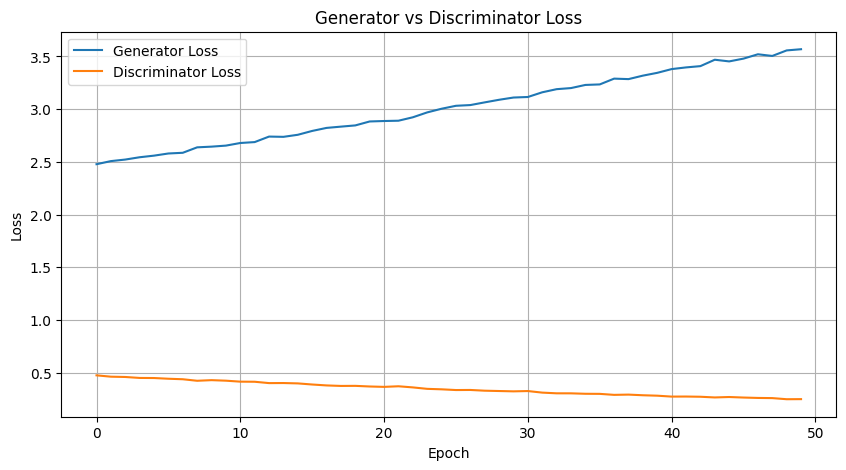

In [32]:
# ✅ Call this first — it trains the model and populates the losses
train(train_dataset, EPOCHS)

# ✅ Then plot the losses after training is complete
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label="Generator Loss")
plt.plot(disc_losses, label="Discriminator Loss")
plt.title("Generator vs Discriminator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
